# Deep Neural Network Regression

We want to predict future temperature given the current real-time weather data returned by IoT sensors.

The neural network will be trained on a publicly available [historical weather dataset](https://github.com/amcquistan/WeatherPredictPythonML) collected using the [Weather Underground API](https://www.wunderground.com/). This dataset contains weather metrics from 1/4/15 to 9/27/17 for the city of Lincoln, Nebraska. For each variable, metrics going three days back are collected. We followed this tutorial: [https://stackabuse.com/using-machine-learning-to-predict-the-weather-part-3/](https://stackabuse.com/using-machine-learning-to-predict-the-weather-part-3/)

For future training, data from the IoT sensors can be included.

### Note: Please use [Google Colab](https://colab.research.google.com/notebooks/welcome.ipynb#recent=true) to run this notebook.

### Prerequisites: 
1.   Hardware accelerator (GPU) is required. Enable GPU in the Google Colab Runtime before training the model.
2.   Upload the **historical_weather_data.csv** file using the Files tab in Google Colab.



### Import required libraries.

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import explained_variance_score, \
    mean_absolute_error, \
    median_absolute_error
from sklearn.model_selection import train_test_split

### Read the data into a pandas dataframe.

In [7]:
df = pd.read_csv('historical_weather_data.csv').set_index('date')

df.describe().T

,count,mean,std,min,25%,50%,75%,max
meantempm,997.0,13.129388,10.971591,-17.0,5.0,15.0,22.00,32.00
maxtempm,997.0,19.509529,11.577275,-12.0,11.0,22.0,29.00,38.00
mintempm,997.0,6.438315,10.957267,-27.0,-2.0,7.0,16.00,26.00
meantempm_1,997.0,13.109328,10.984613,-17.0,5.0,15.0,22.00,32.00
meantempm_2,997.0,13.088265,11.001106,-17.0,5.0,14.0,22.00,32.00
meantempm_3,997.0,13.066199,11.017312,-17.0,5.0,14.0,22.00,32.00
meandewptm_1,997.0,6.440321,10.596265,-22.0,-2.0,7.0,16.00,24.00
meandewptm_2,997.0,6.420261,10.606550,-22.0,-2.0,7.0,16.00,24.00
meandewptm_3,997.0,6.393180,10.619083,-22.0,-2.0,7.0,16.00,24.00
meanpressurem_1,997.0,1016.139418,7.582453,989.0,1011.0,1016.0,1021.00,1040.00


In [8]:
# Get some more information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 2015-01-04 to 2017-09-27
Data columns (total 39 columns):
meantempm          997 non-null int64
maxtempm           997 non-null int64
mintempm           997 non-null int64
meantempm_1        997 non-null float64
meantempm_2        997 non-null float64
meantempm_3        997 non-null float64
meandewptm_1       997 non-null float64
meandewptm_2       997 non-null float64
meandewptm_3       997 non-null float64
meanpressurem_1    997 non-null float64
meanpressurem_2    997 non-null float64
meanpressurem_3    997 non-null float64
maxhumidity_1      997 non-null float64
maxhumidity_2      997 non-null float64
maxhumidity_3      997 non-null float64
minhumidity_1      997 non-null float64
minhumidity_2      997 non-null float64
minhumidity_3      997 non-null float64
maxtempm_1         997 non-null float64
maxtempm_2         997 non-null float64
maxtempm_3         997 non-null float64
mintempm_1         997 non-null float64
mintempm_2

We removed the mintempm and maxtempm columns as they can't be used to predict the average mean temperatures. We also separated out the features (X) from the target (y).

In [0]:
df = df.drop(['mintempm', 'maxtempm'], axis=1)

X = df[[col for col in df.columns if col != 'meantempm']]

y = df['meantempm']

### Split the data into train and test sets.

In [0]:
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)

In [11]:
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

X_train.shape, X_test.shape, X_val.shape
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))

Training instances   797, Training features   36
Validation instances 100, Validation features 36
Testing instances    100, Testing features    36


### Define a list of numeric feature columns.
The ```tf.feature_column.numeric_column()``` function returns a FeatureColumn instance for numeric, continuous, valued features.

In [0]:
feature_cols = [tf.feature_column.numeric_column(col) for col in X.columns]

### Instantiate DNNRegressor class.
Store it in the regressor variable. Specify a neural network that has two layers deep where both layers have a width of 50 nodes. The model data will be stored in a directory called dnn_regression_model.

In [13]:
regressor = tf.estimator.DNNRegressor(feature_columns=feature_cols,
                                      hidden_units=[50, 50],
                                      model_dir='dnn_regression_model')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'dnn_regression_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fbaa1595908>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Define an input function.

This is the input function that will be used to feed data into the neural network during the training and testing phases.


In [0]:
def wx_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=400):
    return tf.estimator.inputs.pandas_input_fn(x=X,
                                               y=y,
                                               num_epochs=num_epochs,
                                               shuffle=shuffle,
                                               batch_size=batch_size)

### Train the model.
This will take some time.

In [15]:
evaluations = []
STEPS = 400
for i in range(100):
    regressor.train(input_fn=wx_input_fn(X_train, y=y_train), steps=STEPS)
    evaluation = regressor.evaluate(input_fn=wx_input_fn(X_val, y_val,
                                                         num_epochs=1,
                                                         shuffle=False),
                                    steps=1)
    evaluations.append(regressor.evaluate(input_fn=wx_input_fn(X_val,
                                                               y_val,
                                                               num_epochs=1,
                                                               shuffle=False)))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into dnn_regression_model/model.ckpt.
INFO:tensorflow:loss = 32990030.0, step = 0
INFO:tensorflow:global_step/sec: 64.8938
INFO:tensorflow:loss = 18427.016, step = 100 (1.548 sec)
INFO:tensorflow:global_step/sec: 70.6013
INFO:tensorflow:loss = 13374.571, step = 200 (1.411 sec)
INFO:tensorflow:global_step/sec: 70.4718
INFO:tensorflow:loss = 13039.895, 

### Print result of evaluations.

In [16]:
evaluations[0]

{'average_loss': 26.394041,
 'global_step': 400,
 'label/mean': 14.25,
 'loss': 2639.404,
 'prediction/mean': 13.894292}

It outputs the average loss (Mean Squared Error) and the total loss (Sum of Squared Errors) for the 400th step. In a highly trained network, the trend typically shows the training and evaluation losses more or less constantly decline in parallel.  However, in an overfitted model at the point where over fitting starts to occur, the validation training set will cease to see reductions in the output of its `evaluate(...)` method.  Right before that change occurs is when we want to stop further training the model.

### Plot evaluations.
Now that we have a collection of evaluations for each of the iterations, they can be plotted as a function of training steps to ensure that the model is not overtrained.

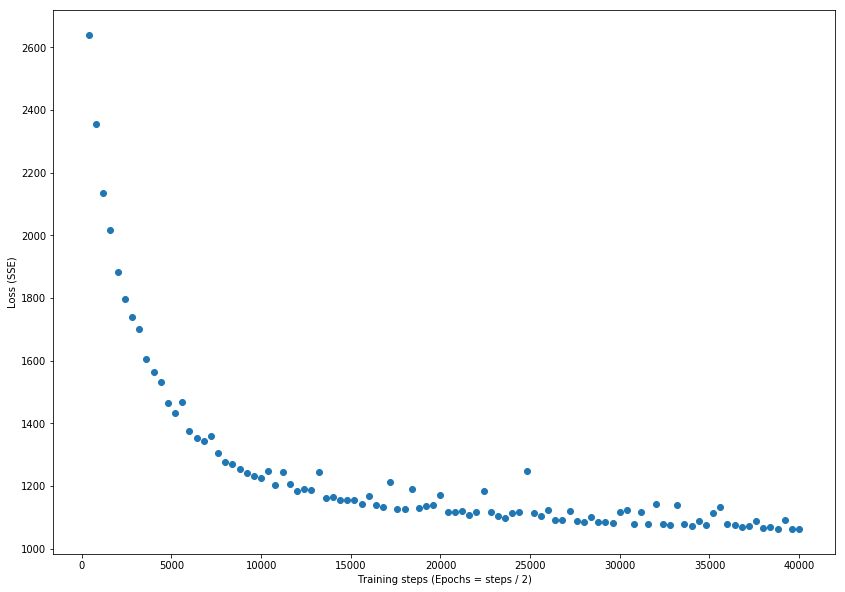

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [14, 10]

loss_values = [ev['loss'] for ev in evaluations]
training_steps = [ev['global_step'] for ev in evaluations]

plt.scatter(x=training_steps, y=loss_values)
plt.xlabel('Training steps (Epochs = steps / 2)')
plt.ylabel('Loss (SSE)')
plt.show()

### Predict.

In [18]:
pred = regressor.predict(input_fn=wx_input_fn(X_test,
                                              num_epochs=1,
                                              shuffle=False))
predictions = np.array([p['predictions'][0] for p in pred])

print("The Explained Variance: %.2f" % explained_variance_score(
                                            y_test, predictions))  
print("The Mean Absolute Error: %.2f degrees Celsius" % mean_absolute_error(
                                            y_test, predictions))  
print("The Median Absolute Error: %.2f degrees Celsius" % median_absolute_error(
                                            y_test, predictions))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from dnn_regression_model/model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
The Explained Variance: 0.87
The Mean Absolute Error: 3.24 degrees Celsius
The Median Absolute Error: 2.64 degrees Celsius


The two models performed quite similarly.


### Compress the model files so it can be downloaded easily.
The compressed file can be downloaded from the Files tab in Google Colab.

In [20]:
!tar -zcvf dnn_regression_model.tar.gz dnn_regression_model

dnn_regression_model/
dnn_regression_model/model.ckpt-38400.data-00000-of-00002
dnn_regression_model/model.ckpt-39600.meta
dnn_regression_model/model.ckpt-38400.index
dnn_regression_model/model.ckpt-40000.data-00001-of-00002
dnn_regression_model/model.ckpt-39600.data-00000-of-00002
dnn_regression_model/model.ckpt-38800.data-00000-of-00002
dnn_regression_model/model.ckpt-38400.data-00001-of-00002
dnn_regression_model/model.ckpt-39600.data-00001-of-00002
dnn_regression_model/model.ckpt-39200.index
dnn_regression_model/model.ckpt-40000.data-00000-of-00002
dnn_regression_model/model.ckpt-39200.data-00000-of-00002
dnn_regression_model/model.ckpt-38800.meta
dnn_regression_model/model.ckpt-40000.meta
dnn_regression_model/graph.pbtxt
dnn_regression_model/model.ckpt-38800.data-00001-of-00002
dnn_regression_model/model.ckpt-39200.data-00001-of-00002
dnn_regression_model/checkpoint
dnn_regression_model/model.ckpt-38800.index
dnn_regression_model/model.ckpt-39600.index
dnn_regression_model/model.c